<a href="https://colab.research.google.com/github/Davidgr11/Computational_Intelligence_AI_DataMining/blob/main/OptimalRouteWithGraphsRoboticCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROGRAMA PARA DETECTAR NODOS Y OBTENER LA RUTA ÓPTIMA***

> ***PROYECTO FINAL ÓPTATIVA 1: ROBÓTICA MÓVIL***


## INTEGRANTES:
1.   BERNAL BENITEZ NICOLAS
2.   CABALLERO ÁNGELES KARINA
3.   CERON BERNARDINO ALAN MIGUEL
4.   GÓMEZ JIMÉNEZ RICARDO ABSALON
5.   GONZÁLEZ ROBLES DAVID ALEJANDRO

### ***IMPORTACIÓN DE LIBRERÍAS Y PAQUETES***

In [ ]:
# PARA EL RECONOCIMIENTO ÓPTICO DE CARACTERES OCR
!pip install pytesseract
!apt-get install tesseract-ocr # MOTOR OCR
import pytesseract

# PERMITE EL PROCESAMIENTO DE IMÁGENES Y VIDEOS CON VISIÓN COMPUTACIONAL
import cv2

# SOPORTE PARA ARREGLOS Y MATRICES
import numpy as np

# MOSTRAR IMÁGENES EN COLAB QUE ADAPTA EL OPENCV
from google.colab.patches import cv2_imshow

# CARCAR Y DESCARGAR ARCHIVOS
from google.colab import files

# OPERACIONES MATEMÁTICAS
import math

# PARA EL GRAFO
import heapq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


### ***DETECCIÓN DE LETRAS Y EXTRACCIÓN DE NODOS CON LISTAS***

Saving proyecto02.jpg to proyecto02.jpg
Letras detectadas (previo): ['D', 'B', '', 'M', 'A', 'G']
Centros detectados (previo): [(1465, 100), (553, 130), (1034, 303), (213, 523), (1352, 908), (691, 916)]


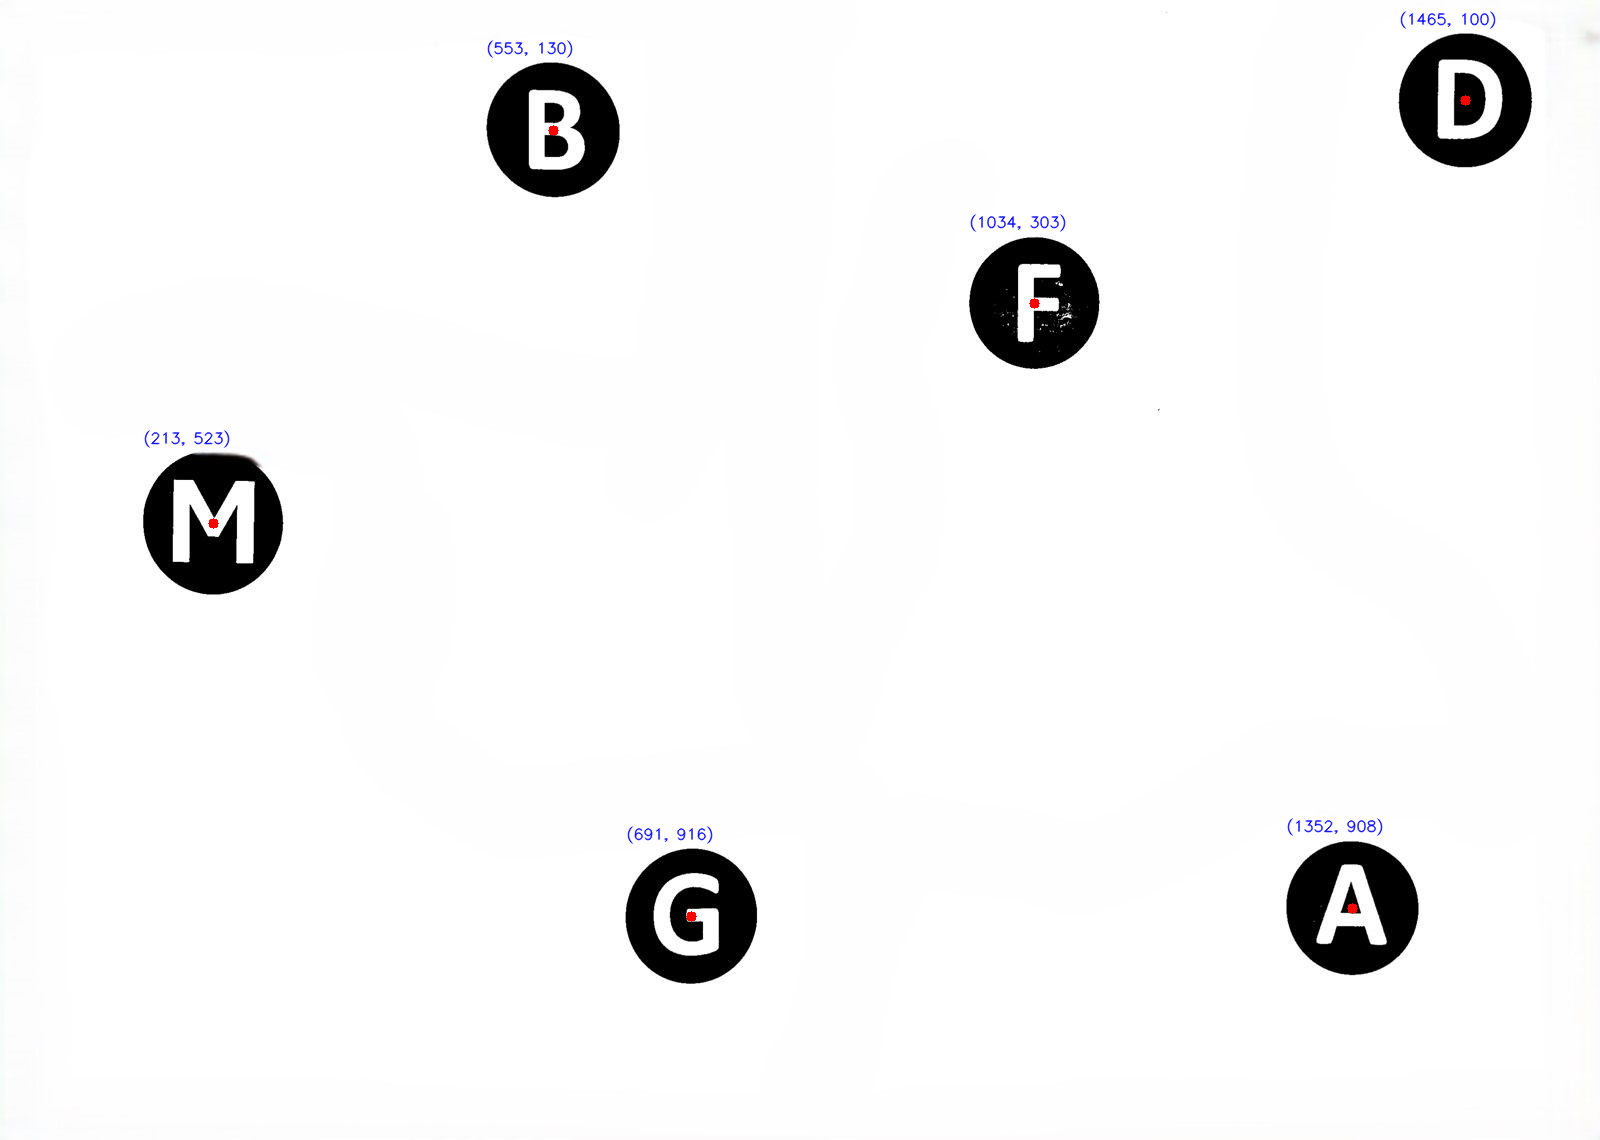

Ingresa las letras y centros manualmente. Para dejar un valor sin cambios, presiona Enter.
Letra en la posición 0 (actualmente "D"): 
Centro en la posición 0 (actualmente (1465, 100)): 
Letra en la posición 1 (actualmente "B"): 
Centro en la posición 1 (actualmente (553, 130)): 
Letra en la posición 2 (actualmente ""): F
Centro en la posición 2 (actualmente (1034, 303)): 
Letra en la posición 3 (actualmente "M"): 
Centro en la posición 3 (actualmente (213, 523)): 
Letra en la posición 4 (actualmente "A"): 
Centro en la posición 4 (actualmente (1352, 908)): 
Letra en la posición 5 (actualmente "G"): 
Centro en la posición 5 (actualmente (691, 916)): 
Letras detectadas (final): ['D', 'B', 'F', 'M', 'A', 'G']
Centros detectados (final): [(1465, 100), (553, 130), (1034, 303), (213, 523), (1352, 908), (691, 916)]


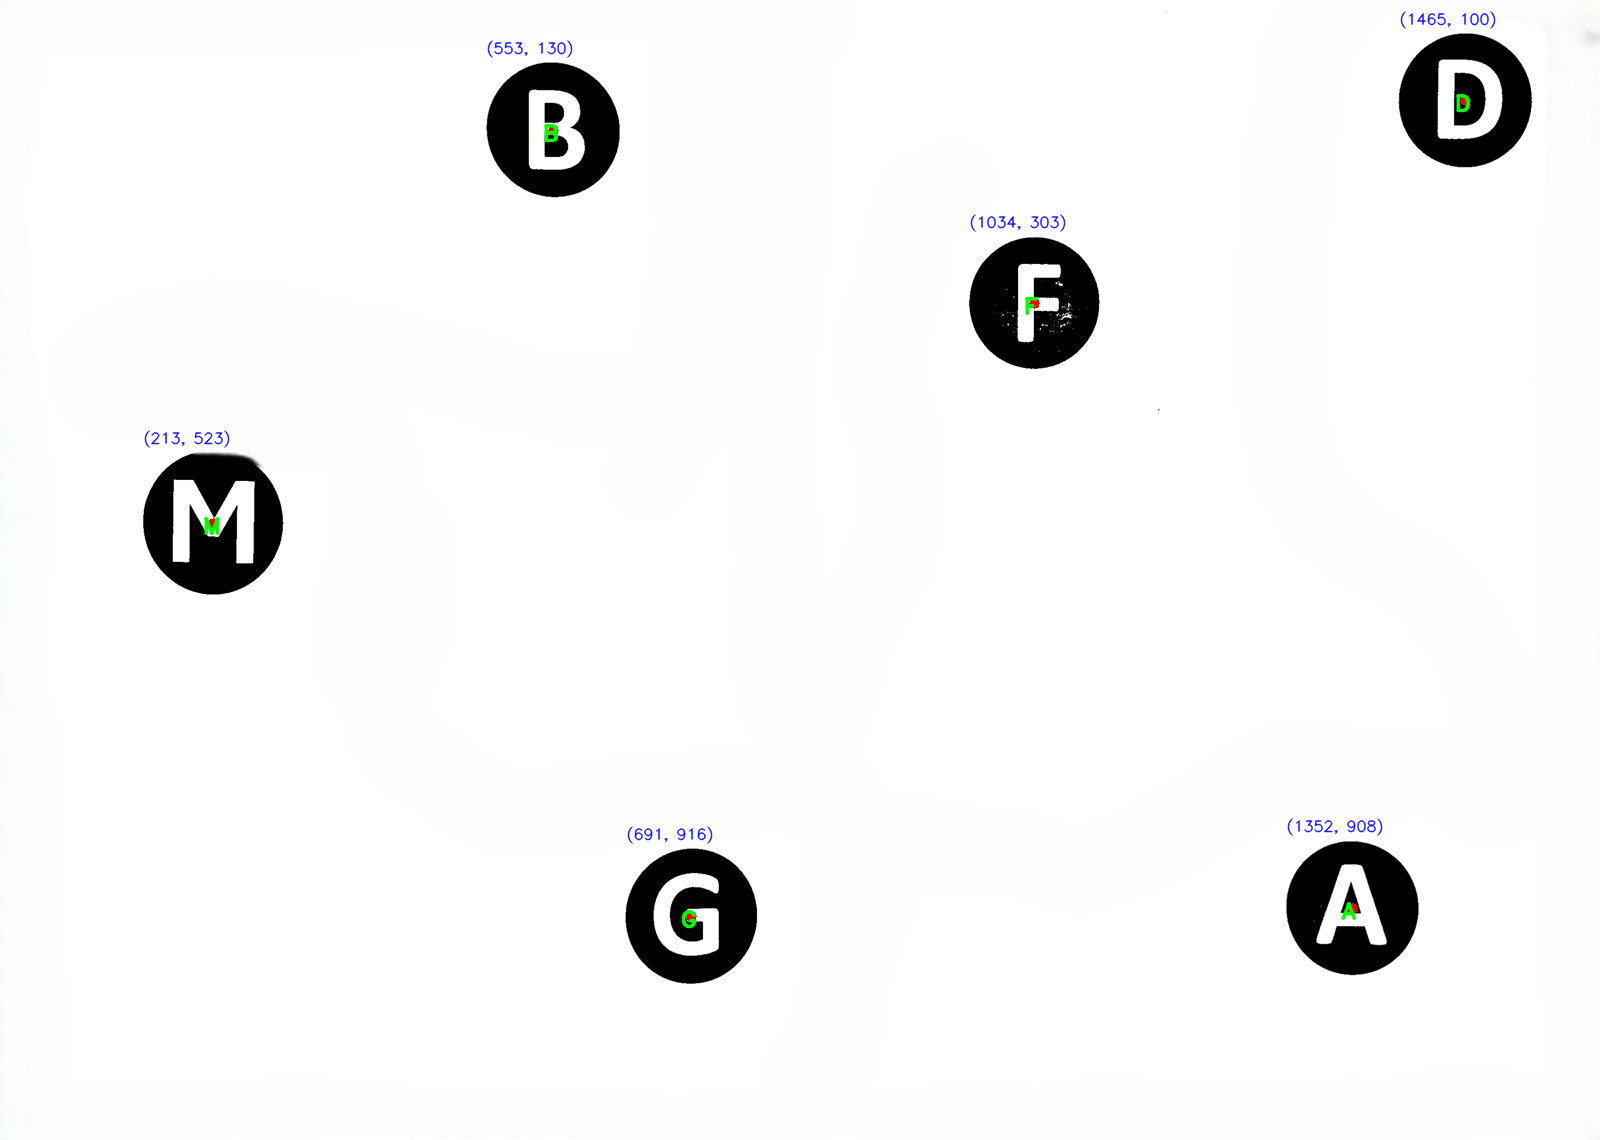

In [ ]:
# CARGAR ARCHIVO
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)

if img is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta y el nombre del archivo.")
else:
    # CONVERTIR A ESCALA DE GRISES
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # FILTRAR PARA REDUCIR RUIDO
    gray_img = cv2.medianBlur(gray_img, 3)
    # BINARIZAR LA IMAGEN
    binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # DETECTAR CONTORNOS
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # ORDENA CONTORNOS DE ARRIBA A ABAJO, IZQUIERDA A DERECHA
    contours = sorted(contours, key=lambda ctr: (cv2.boundingRect(ctr)[1], cv2.boundingRect(ctr)[0]))


    # LISTAS DE LETRAS Y CENTROS
    letras_detectadas = []
    centros_detectados = []


    for contour in contours:
        # AREA DEL CONTORNO
        area = cv2.contourArea(contour)
        # FILTRAR CONTORNOS CON ÁREA
        if area > 100:  # AJUSTA VALOR SEGÚN TAMAÑOS DE NODOS
            # OBTENER RECTANGULO QUE DELIMITA CADA CONTORNO
            x, y, w, h = cv2.boundingRect(contour)
            # CENTROS DEL RECTANGULO
            center_x = x + w // 2
            center_y = y + h // 2


            # DIBUJAR CIRCULOS DE CADA NODO
            cv2.circle(img, (center_x, center_y), 5, (0, 0, 255), -1)
            # PONER TEXTO DE COORDENADAS
            cv2.putText(img, f'({center_x}, {center_y})', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)


            # EXTRAER LA REGIÓN DE INTERÉS (ROI)
            roi = binary_img[y:y+h, x:x+w]
            # APLICAR DILATACIÓN Y EROSIÓN PARA DETECTAR LETRA
            kernel = np.ones((3,3), np.uint8)
            roi = cv2.dilate(roi, kernel, iterations=1)
            roi = cv2.erode(roi, kernel, iterations=1)
            # RECONOCER LA LETRA
            config = '--psm 10 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'
            letra = pytesseract.image_to_string(roi, config=config).strip()
            # LIMITAR A UN SOLO CARACTER
            if letra and len(letra) > 1:
                letra = letra[0]  # GUARDA SOLO EL PRIMERO


            # ESCRIBIR EN LAS LISTAS
            letras_detectadas.append(letra)
            centros_detectados.append((center_x, center_y))


    # IMPRIMIR LISTAS
    print('Letras detectadas (previo):', letras_detectadas)
    print('Centros detectados (previo):', centros_detectados)
    # MOSTRAR IMAGEN
    cv2_imshow(img)


    # MODIFICAR DE NODOS EN CASO DE ERROR
    print('Ingresa las letras y centros manualmente. Para dejar un valor sin cambios, presiona Enter.')
    for i, (letra, centro) in enumerate(zip(letras_detectadas, centros_detectados)):
        new_letra = input(f'Letra en la posición {i} (actualmente "{letra}"): ')
        new_centro = input(f'Centro en la posición {i} (actualmente {centro}): ')
        if new_letra:
            letras_detectadas[i] = new_letra
        if new_centro:
            centros_detectados[i] = eval(new_centro)

    # IMPRIMIR LISTAS
    print('Letras detectadas (final):', letras_detectadas)
    print('Centros detectados (final):', centros_detectados)

    # SE MUESTRA LA IMAGEN FINAL
    for letra, centro in zip(letras_detectadas, centros_detectados):
        cv2.putText(img, letra, (centro[0] - 10, centro[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
        #cv2.putText(img, f'({centro[0]}, {centro[1]})', (centro[0] + 20, centro[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    cv2_imshow(img)


### ***ESTABLECER CONEXIONES ENTRE NODOS Y DEFINIR EL GRAFO***

Conexiones para la letra D (separadas por comas): G
Conexiones para la letra B (separadas por comas): F, G, A
Conexiones para la letra F (separadas por comas): D, A
Conexiones para la letra M (separadas por comas): B, G
Conexiones para la letra A (separadas por comas): D, G
Conexiones para la letra G (separadas por comas): F


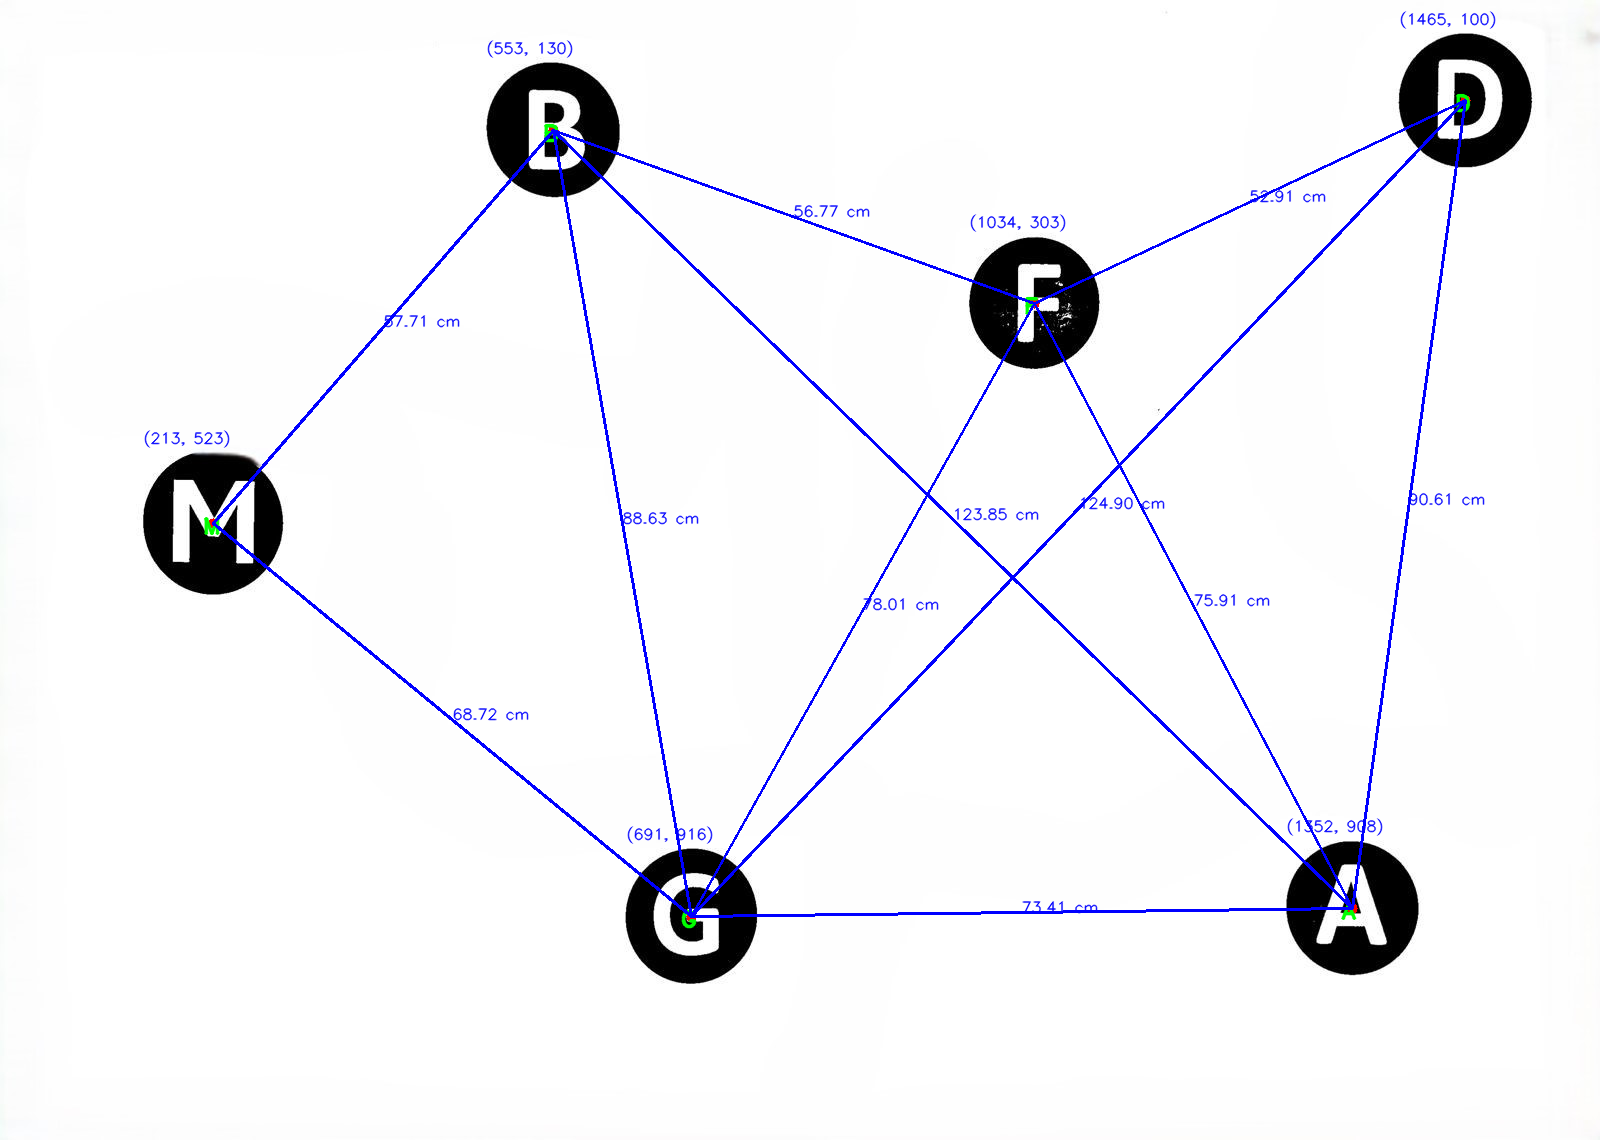

Grafo de conexiones y distancias (en cm):
{'D': {'G': 124.90409205873736}, 'B': {'F': 56.76811472842025, 'G': 88.62540726369393, 'A': 123.85064573722777}, 'F': {'D': 52.908726209702785, 'A': 75.90507065244427}, 'M': {'B': 57.71176596288921, 'G': 68.72337415146343}, 'A': {'D': 90.60673886482577, 'G': 73.41356968812104}, 'G': {'F': 78.0100527176017}}


In [ ]:
# DIMENSIONES DE NUESTRA BASE
ancho_cm = 180
alto_cm = 125

# CALCULAR ESCALA EN PIXELES POR CM CON PROMEDIOS
escala_x = img.shape[1] / ancho_cm
escala_y = img.shape[0] / alto_cm
escala_promedio = (escala_x + escala_y) / 2

# MATRIZ DE CONEXIONES
conexiones = []

# GRAFO CON DICCIONARIO
graph = {}

# SOLICITAR LAS CONEXIONES AL USUARIO
for i, letra in enumerate(letras_detectadas):
    while True:
        try:
            conexiones_nodo = input(f'Conexiones para la letra {letra} (separadas por comas): ').split(', ')
            if all(con in letras_detectadas for con in conexiones_nodo):
                conexiones.append(conexiones_nodo)
                break
            else:
                print("Una o más conexiones no son válidas. Inténtalo de nuevo.")
        except ValueError:
            print("Entrada inválida. Inténtalo de nuevo.")

# DIBUJAR LINEAS, CALCULAR DISTANCIAS Y ALMACENAR GRAFO
for i, (letra, (center_x, center_y)) in enumerate(zip(letras_detectadas, centros_detectados)):
    graph[letra] = {}
    for conexion in conexiones[i]:
        indice_conexion = letras_detectadas.index(conexion)
        centro_conexion = centros_detectados[indice_conexion]

        # CALCULA DISTANCIA EN PIXELES
        distancia_px = math.sqrt((centro_conexion[0] - center_x) ** 2 + (centro_conexion[1] - center_y) ** 2)

        # CONVIERTE A CM
        distancia_cm = distancia_px / escala_promedio

        # DIBUJA LAS LÍNEAS DE CONEXIONES
        cv2.line(img, (center_x, center_y), (centro_conexion[0], centro_conexion[1]), (255, 0, 0), 2)

        # MOSTRAR TEXTO DE DISTANCIAS
        texto_distancia = f'{distancia_cm:.2f} cm'
        centro_texto = ((center_x + centro_conexion[0]) // 2, (center_y + centro_conexion[1]) // 2)
        cv2.putText(img, texto_distancia, centro_texto, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # GUARDAR CONEXIÓN EN EL GRAFO
        graph[letra][conexion] = distancia_cm

# MOSTRAR IMAGEN
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# IMPRIMIR GRAFO
print("Grafo de conexiones y distancias (en cm):")
print(graph)


# ***RUTA MÁS CORTA***

Ingrese el nodo inicio: F
Ingrese el nodo fin: A


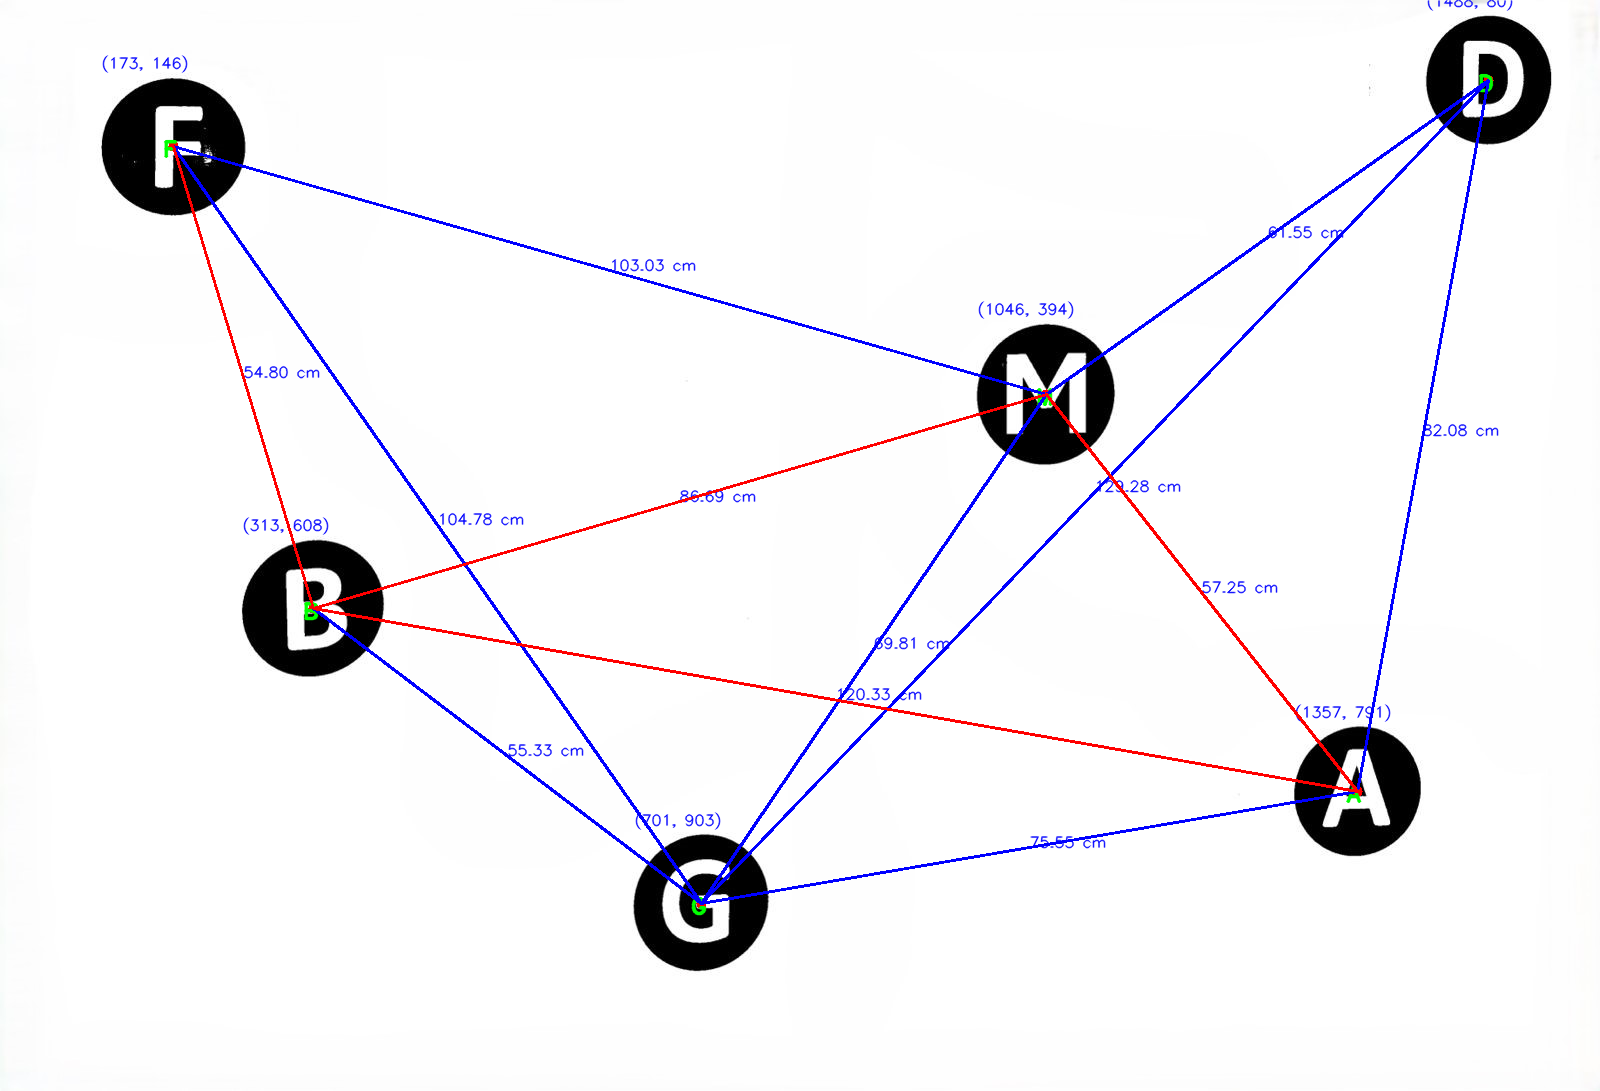

Ruta más corta de F a A:
[('F', 54.80494464517383, 'B'), ('B', 120.32969683815956, 'A')]
Distancia total: 175.13 cm
Instrucciones para el robot:
Avanzar 15.75 cm hacia la derecha
Avanzar 52.93 cm hacia abajo
Avanzar 117.45 cm hacia la derecha
Avanzar 20.97 cm hacia abajo


In [ ]:
# USO DEL ALGORITMO DE Dijkstra
def dijkstra(graph, inicio, fin):
    queue = [(0, inicio, [])]
    seen = set()
    while queue:
        (cost, v1, path) = heapq.heappop(queue)
        if v1 in seen:
            continue
        path = path + [v1]
        seen.add(v1)
        if v1 == fin:
            return (cost, path)
        for v2, c in graph[v1].items():
            if v2 not in seen:
                heapq.heappush(queue, (cost + c, v2, path))
    return (float("inf"), [])

# SOLICITAR NODO INICIO Y FIN
nodo_inicio = input('Ingrese el nodo inicio: ')
nodo_fin = input('Ingrese el nodo fin: ')

# VALIDACIÓN
if nodo_inicio not in graph or nodo_fin not in graph:
    print("Uno o ambos nodos no son válidos.")
else:
    # ENCUENTRA LA RUTA
    distancia_total, ruta = dijkstra(graph, nodo_inicio, nodo_fin)

    if distancia_total == float("inf"):
        print("No hay una ruta disponible entre los nodos.")
    else:
        # DIBUJA LA RUTA
        for i in range(len(ruta) - 1):
            nodo_actual = ruta[i]
            nodo_siguiente = ruta[i + 1]
            indice_actual = letras_detectadas.index(nodo_actual)
            indice_siguiente = letras_detectadas.index(nodo_siguiente)
            cv2.line(img, centros_detectados[indice_actual], centros_detectados[indice_siguiente], (0, 0, 255), 2)

        # MUESTRA LA IMAGEN
        cv2_imshow(img)

        # IMPRIME LA RUTA Y LA DISTANCIA
        print(f"Ruta más corta de {nodo_inicio} a {nodo_fin}:")
        ruta_distancias = []
        for i in range(len(ruta) - 1):
            nodo_actual = ruta[i]
            nodo_siguiente = ruta[i + 1]
            distancia = graph[nodo_actual][nodo_siguiente]
            ruta_distancias.append((nodo_actual, distancia, nodo_siguiente))
        print(ruta_distancias)
        print(f"Distancia total: {distancia_total:.2f} cm")



        """ Instrucciones para el robot en general
        instrucciones = []
        for i in range(len(ruta) - 1):
            nodo_actual = ruta[i]
            nodo_siguiente = ruta[i + 1]
            distancia = graph[nodo_actual][nodo_siguiente]

            if i == 0:
                instrucciones.append(f"Avanzar {distancia:.2f} cm hacia {nodo_siguiente}")
            else:
                indice_anterior = letras_detectadas.index(ruta[i - 1])
                centro_anterior = centros_detectados[indice_anterior]
                centro_actual = centros_detectados[letras_detectadas.index(nodo_actual)]
                centro_siguiente = centros_detectados[letras_detectadas.index(nodo_siguiente)]

                vector_anterior = (centro_actual[0] - centro_anterior[0], centro_actual[1] - centro_anterior[1])
                vector_siguiente = (centro_siguiente[0] - centro_actual[0], centro_siguiente[1] - centro_actual[1])

                angulo_anterior = math.atan2(vector_anterior[1], vector_anterior[0])
                angulo_siguiente = math.atan2(vector_siguiente[1], vector_siguiente[0])
                angulo_giro = math.degrees(angulo_siguiente - angulo_anterior)

                if angulo_giro < 0:
                    instrucciones.append(f"Girar {abs(angulo_giro):.2f} grados a la izquierda y avanzar {distancia:.2f} cm hacia {nodo_siguiente}")
                else:
                    instrucciones.append(f"Girar {angulo_giro:.2f} grados a la derecha y avanzar {distancia:.2f} cm hacia {nodo_siguiente}")

        print("Instrucciones para el robot:")
        for instruccion in instrucciones:
            print(instruccion)
        """
        """ Instrucciones para el robot con ruedas Mecanum
        instrucciones = []
        for i in range(len(ruta) - 1):
            nodo_actual = ruta[i]
            nodo_siguiente = ruta[i + 1]
            distancia = graph[nodo_actual][nodo_siguiente]
            centro_actual = centros_detectados[letras_detectadas.index(nodo_actual)]
            centro_siguiente = centros_detectados[letras_detectadas.index(nodo_siguiente)]

            delta_x = centro_siguiente[0] - centro_actual[0]
            delta_y = centro_siguiente[1] - centro_actual[1]

            if delta_x == 0:
                if delta_y > 0:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm hacia abajo")
                else:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm hacia arriba")
            elif delta_y == 0:
                if delta_x > 0:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm hacia la derecha")
                else:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm hacia la izquierda")
            else:
                if delta_x > 0 and delta_y > 0:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm en diagonal hacia abajo-derecha")
                elif delta_x > 0 and delta_y < 0:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm en diagonal hacia arriba-derecha")
                elif delta_x < 0 and delta_y > 0:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm en diagonal hacia abajo-izquierda")
                else:
                    instrucciones.append(f"Avanzar {distancia:.2f} cm en diagonal hacia arriba-izquierda")

        print("Instrucciones para el robot:")
        for instruccion in instrucciones:
            print(instruccion)
        """

        # INSTRUCCIONES ROBOT CON RUEDAS Mecanum
        instrucciones = []
        for i in range(len(ruta) - 1):
            nodo_actual = ruta[i]
            nodo_siguiente = ruta[i + 1]
            distancia = graph[nodo_actual][nodo_siguiente]
            centro_actual = centros_detectados[letras_detectadas.index(nodo_actual)]
            centro_siguiente = centros_detectados[letras_detectadas.index(nodo_siguiente)]

            delta_x = centro_siguiente[0] - centro_actual[0]
            delta_y = centro_siguiente[1] - centro_actual[1]

            if delta_x != 0:
                direccion = "derecha" if delta_x > 0 else "izquierda"
                instrucciones.append(f"Avanzar {abs(delta_x) / escala_x:.2f} cm hacia la {direccion}")

            if delta_y != 0:
                direccion = "abajo" if delta_y > 0 else "arriba"
                instrucciones.append(f"Avanzar {abs(delta_y) / escala_y:.2f} cm hacia {direccion}")

        print("Instrucciones para el robot:")
        for instruccion in instrucciones:
            print(instruccion)